## Matrix Multiplication

Given a matrix $X$ with $n$ rows and $m$ columns,

And a matrix $Y$ with $m$ rows and $p$ columns,

The matrix $Z$ is a product of $X$ and $Y$ with $n$ rows and $p$ columns. 

if

$\forall{i} \in 1\dots n, \forall{j} \in 1\dots p$

$Z_{ij} = \displaystyle\sum_{k=1}^{m} X_{ik}Y_{kj}$

In [1]:
left = [[1, 2, 3], [4, 5, 6]] # 2 rows and 3 columns
right = [[1, 2], [3, 4], [5, 6]] # 3 rows and 2 columns

In [2]:
def get_row(m, i):
    return m[i]

def get_col(m, i):
    return [row[i] for row in m]

def dot_vector(l, r):
    return sum([t[0] * t[1] for t in list(zip(l, r))])

def zero_m(h, w):
    m = []
    for r in range(h):
        m.append([0] * w)
    return m
            

def shape_m(m):
    return (len(m), len(m[0]))  # (rows, cols)

def dot_matrix(l, r):
    rows_l, cols_l = shape_m(l)
    rows_r, cols_r = shape_m(r)
    
    if not cols_l == rows_r:
        raise ValueError('columns on left must equal rows on right')
        
    zeroes = zero_m(rows_l, cols_r)
    
    for row in range(rows_l):
        for col in range(cols_r): 
            zeroes[row][col] = dot_vector(get_row(l, row), get_col(r, col)) # c_ij
            
    return zeroes
    
    

In [3]:
dot_matrix(left, right)

[[22, 28], [49, 64]]

## `numpy`

The `numpy` library provides a more efficient implementation.

In [4]:
import numpy as np

In [5]:
p = np.array(left)
q = np.array(right)

In [6]:
p.dot(q)

array([[22, 28],
       [49, 64]])

A useful concept in Jupyter Notebook is the *magic command* which is similar to a macro.  Magic commands are always prefixed with a percent sign (*%*)

The `timeit` magic command will run the code in the rest of the line over and over and return the average run time.

In [7]:
%timeit dot_matrix(left, right)

8.79 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%timeit p.dot(q)

755 ns ± 1.21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


This shows that the brute force implementation of matrix multiplication is a lot slower than the `numpy` implementation which is written in C.

In [9]:
data = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]

In [10]:
def sum_vector(*args):
    length = len(args[0])
    for v in args:
        if not len(v) == length:
            raise ValueError('length of all vectors must be the same')
    return [sum(t) for t in list(zip(*args))]

sum_vector(*data)

[6, 9, 12]

In [11]:
np.array(data[0]) + np.array(data[1]) + np.array(data[2])

array([ 6,  9, 12])

## `pandas`

The `pandas` library is for statistical analysis

In [12]:
import pandas as pd

Data can be loaded from a csv file into a data frame.  This is the fundamental data structure in pandas.  It is similar to the data frame in R.

In [13]:
df = pd.read_csv('dow_jones_index/dow_jones_index.csv')

In [14]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


Take a subset of the columns and copy them to suppress a warning.

In [15]:
v = df[df.columns[1:8]].copy()

In [16]:
v.head()

,stock,date,open,high,low,close,volume
0,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616
1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398
2,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495
3,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173
4,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761


The values in the columns with a dollar sign are currently of type `str`.  However, we'd need to work with them as `float`.  This is easy in `pandas` converting 3000 values with 2 lines of code.  The `lambda` is an anonymous function that slices the value thus omitting the dollar sign and then converting it to a `float`.  This function is applied to every value in a column and then assigned back to that column in the data frame.

In [17]:
for column in v.columns[2:6]:
    v[column] = v[column].apply(lambda x: float(x[1:]), 1)

In [18]:
v.head()

,stock,date,open,high,low,close,volume
0,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616
1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398
2,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495
3,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173
4,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761


A data frame can be filtered with boolean expressions by one or more columns.

In [19]:
listing = v[v['stock'] == 'HD']

In [20]:
listing.head()

,stock,date,open,high,low,close,volume
120,HD,1/7/2011,35.20,35.57,34.18,34.38,56576860
121,HD,1/14/2011,34.16,35.89,34.07,35.89,41918450
122,HD,1/21/2011,35.97,36.99,35.48,36.51,45249920
123,HD,1/28/2011,36.46,38.12,36.30,36.70,63397367
124,HD,2/4/2011,37.13,37.18,36.38,36.80,41844858


## `matplotlib`

The `matplotlib` library is for visualization of data.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

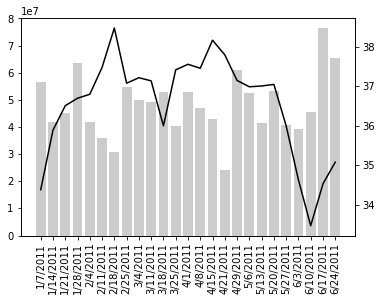

In [22]:
y = listing.close
x = list(range(len(y)))

plt.xticks(np.arange(len(x)), listing.date, rotation='vertical')

y2 = listing.volume
plt.bar(x, y2, color='#cccccc')
ax2 = plt.twinx()
ax2.plot(x, y, color='k')

## Dashboard

Using `ipywidgets` will create interactive JavaScript controls which can be used to manipulate data with a friendly interface instead of code

In [23]:
import ipywidgets as widgets
from IPython.core.display import display

In [24]:
stock_dict = {}

for stock in v.stock.unique():
    stock_dict[stock] = v[v.stock == stock]

date_slider = widgets.SelectionRangeSlider(options=list(stock_dict['AA'].date), 
    index=(0, 24), 
    description='Dates', 
    layout=widgets.Layout(width='500px'))
show_vol2 = widgets.Checkbox(description='Show Volume')
dd_select3 = widgets.Dropdown(options=sorted(list(stock_dict.keys())))
button = widgets.Button(description='Show Graph')

def button_click(b):
    stock_row = stock_dict[dd_select3.value]
    start_index = date_slider.index[0]
    end_index = date_slider.index[1]
    stock_row = stock_row[start_index:(end_index+1)]
    
    y = stock_row.close
    x = list(range(len(y)))
    
    plt.xticks(np.arange(len(x)), stock_row.date, rotation='vertical')
    
    if show_vol2.value == False:
        plt.plot(x, y, color='k')
    else:
        y2 = stock_row.volume
        plt.bar(x, y2, color='#cccccc')
        ax2 = plt.twinx()
        ax2.plot(x, y, color='k')

button.on_click(button_click)

display(date_slider)
display(show_vol2)
display(dd_select3)
display(button)

SelectionRangeSlider(description='Dates', index=(0, 24), layout=Layout(width='500px'), options=('1/7/2011', '1…

Checkbox(value=False, description='Show Volume')

Dropdown(options=('AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC…

Button(description='Show Graph', style=ButtonStyle())